In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Heihgt')

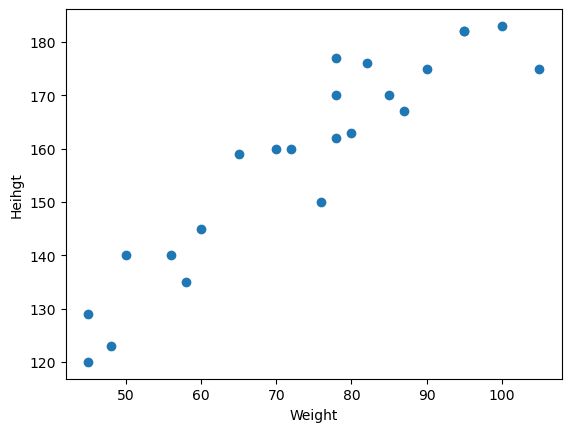

In [32]:
# scatter to know the relation between the weight and height
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Heihgt')

In [33]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


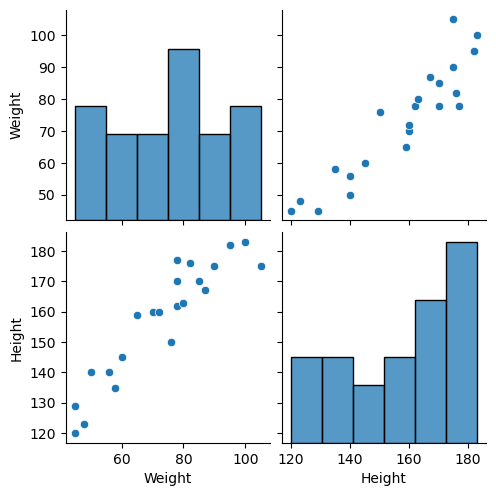

In [34]:
import seaborn as sns
sns.pairplot(df)

In [35]:
X = df[['Weight']] ### independent features should be data frame or 2 dimentional 
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [36]:
y = df['Height']
y.shape

(23,)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
## apply standardization to make the date with zero mean and 1 standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.coef_

array([18.42872181])

In [41]:
regressor.intercept_

156.5

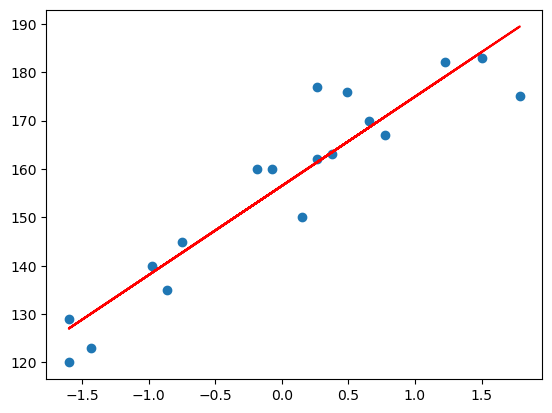

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='r')

In [43]:
y_pred = regressor.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"mean squared error: {mse}")
print(f"mean absolute error: {mae}")
print(f"root mean squared error: {rmse}")

mean squared error: 53.99916705145256
mean absolute error: 6.342265486725654
root mean squared error: 7.348412553160891


In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

score

0.7487943475462757

In [49]:
N = len(y_test)
P = X_test.shape[1]
adjusted_R_squared = (1 - (1 - score) * (1 - N)) / (N - P - 1 )
adjusted_R_squared

0.6682742032716323